In [1]:
from scipy.stats import wald, norm
import numpy as np
import matplotlib.pyplot as plt

### Строю гистограму случайного распределения и сравниваю с графиком

### В качестве примера взял непрерывное распределение Вальда. Для которого матожидание равно 1, а дисперсия 1/n

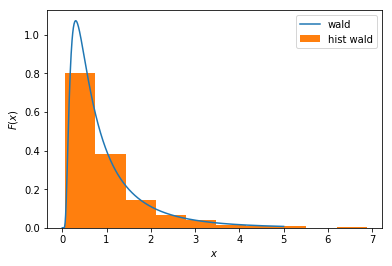

In [2]:
rv = wald(0, 1)
selection = rv.rvs(size=1000)
#print(selection.max())
x = np.linspace(0, 5, 1000)
pdf = rv.pdf(x)

#рисуем теоретическую плотность распределения
plt.plot(x, pdf, label='wald')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
 
#рисуем гистограмму
plt.hist(selection, density=True, label='hist wald')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='best')

## Вывожу библиотечные значения средней и дисперсии

In [3]:
mean, var, skew, kurt = wald.stats(moments='mv')

ValueError: not enough values to unpack (expected 4, got 2)

In [7]:
print(f'mean = {mean}, var = {var}')

mean = 1.0, var = 1.0, skew = 3.0, kurt = 15.0


## Реализую функцию выводящую гистограму случайного распределения и график нормального распределения

In [1]:
def plot_rvx(rv, n, count=1000):
    
    array_means = []
    for i in range(count):
        #x = np.linspace(0, 5, n)
        #pdf = rv.pdf(x)
        rvs = rv.rvs(size=n)
        array_means.append(rvs.mean())
        #print(array_means)
    plt.hist(array_means, density=True, label=f'RVS(n={n})')
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    '''Значение нормального распределения
    
    '''
    #return
    mu = 1
    dispersion = 1/float(n)
    norm_rv = norm(mu,dispersion)
    x = np.linspace(0, 2, 100)
    y = norm_rv.pdf(x)
    plt.plot(x, y, label='Norm')
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best')

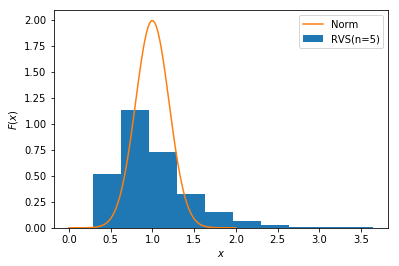

In [64]:
plot_rvx(rv, 5)

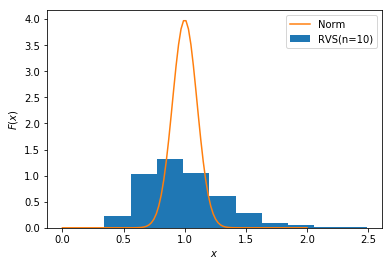

In [65]:
plot_rvx(rv, 10)

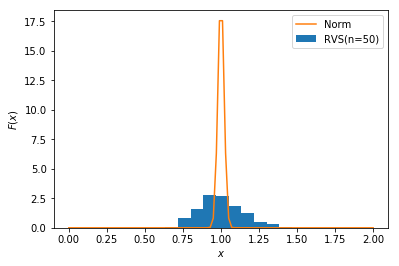

In [66]:
plot_rvx(rv, 50)

## Вывод при большом числе случайных независимых выборок любое непрерывное распределение стремится к нормальному